<function matplotlib.pyplot.show(close=None, block=None)>

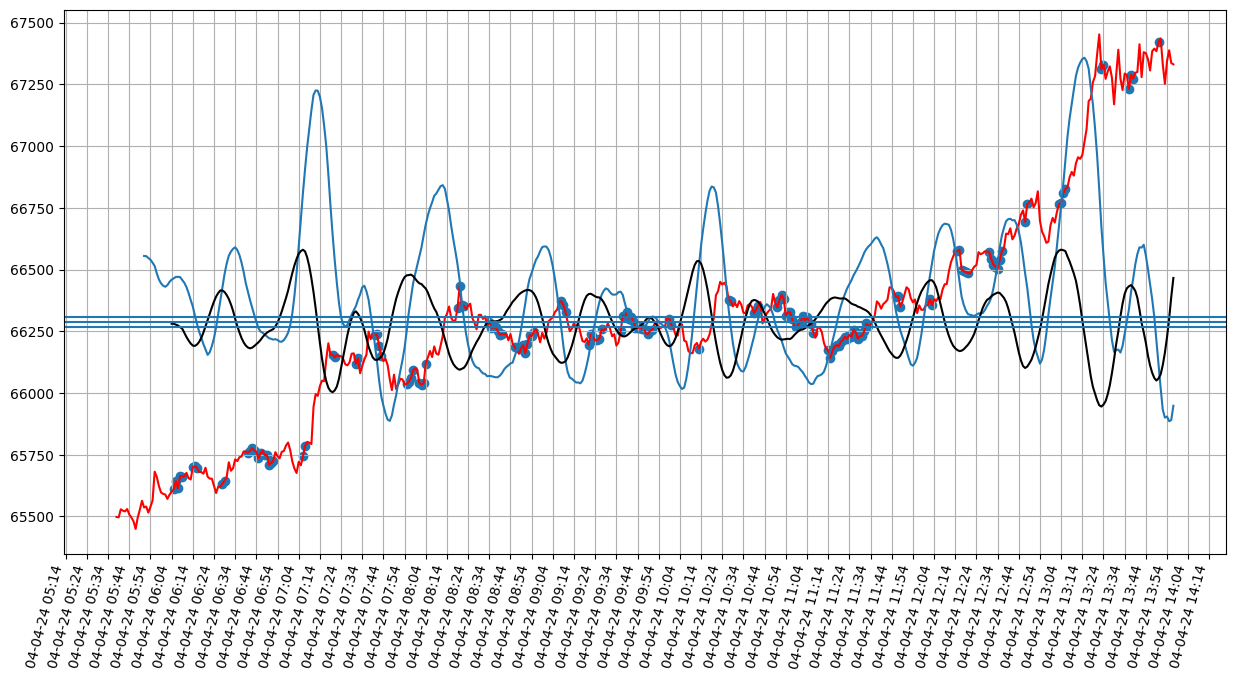

In [51]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Conexión con Binance para descargar la lista de pares que binance maneja
from binance import Client
client = Client()


##################################################################################################################################
# Descarga y limpieza de datos de 5 días en adelante
##################################################################################################################################
# recent_data = pd.DataFrame(client.get_historical_klines('BTCUSDT','1m','1 day ago UTC'))
# recent_data = recent_data.iloc[:,:6]
# recent_data.columns = ['Tiempo','Open','High','Low','Close','Volume']
# recent_data['Tiempo'] = pd.to_datetime(recent_data.Tiempo,unit='ms')
# #recent_data['Tiempo'] = recent_data.Tiempo.astype('datetime64')
# recent_data = recent_data.set_index('Tiempo')
# recent_data = recent_data.astype(float)
# recent_data = recent_data.reset_index()
# recent_data['Interpolacion'] = sc.signal.savgol_filter(recent_data.Open,25,3)
# recent_data['Primer_Derivada'] = recent_data.Interpolacion.diff()
# recent_data['PD_Interpolacion'] = sc.signal.savgol_filter(recent_data.Primer_Derivada,25,3)
# recent_data['Segunda_Derivada'] = recent_data.PD_Interpolacion.diff()
# recent_data['SD_Interpolacion'] = sc.signal.savgol_filter(recent_data.Segunda_Derivada,25,3)
# recent_data


##################################################################################################################################
# Gráfica final del backtesting sobre nuestro análisis con puntos de compra y venta.
##################################################################################################################################
a = 0
d = 500

min_max_sd = pd.DataFrame(columns=['Derivada'])
min_max_sd['Derivada'] = recent_data[a:a+d].SD_Interpolacion.diff()
lista_min_max = min_max_sd[(min_max_sd['Derivada'] >= -0.1) & (min_max_sd['Derivada'] <= 0.1)]
indices_min_max = lista_min_max.index.tolist()


######################################################################
# Agregamos el código necesario para encontrar los puntos exactos mínimos y máximos
######################################################################
drlist = []
lista_min_max = lista_min_max.reset_index()
lista_min_max.columns = ['indice','Derivada']
mp = recent_data.Open[a:a+d].mean()


for i in range(1,len(lista_min_max)-1):
    if (recent_data.SD_Interpolacion.diff()[lista_min_max.indice[i-1]] >= lista_min_max.Derivada[i]) & (recent_data.SD_Interpolacion.diff()[lista_min_max.indice[i+1]] >= lista_min_max.Derivada[i]): # & (recent_data.SD_Interpolacion[lista_min_max.indice[i]]*100 < (mp - np.std(recent_data.SD_Interpolacion)*10)):
        drlist.append(lista_min_max.indice[i])
#        minlist.append(lista_min_max[i])
    elif (recent_data.SD_Interpolacion.diff()[lista_min_max.indice[i-1]] <= lista_min_max.Derivada[i]) & (recent_data.SD_Interpolacion.diff()[lista_min_max.indice[i+1]] <= lista_min_max.Derivada[i]): # & (recent_data.SD_Interpolacion[lista_min_max.indice[i]]*100 > (mp + np.std(recent_data.SD_Interpolacion)*10)):
        drlist.append(lista_min_max.indice[i])
#        maxlist.append(lista_min_max[i])


######################################################################
# Gráficas resultantes de los análisis anteriores.
######################################################################
# plt.axvline(halving_dates['Halving_Dates'][2])
# plt.axvline(halving_dates['Halving_Dates'][3])
plt.figure(figsize=(15,8))
plt.plot(recent_data.Tiempo[a:a+d],recent_data.Open[a:a+d].multiply(1),color='red')
plt.plot(recent_data.Tiempo[a:a+d],recent_data.PD_Interpolacion[a:a+d].multiply(30)+mp)
plt.plot(recent_data.Tiempo[a:a+d],recent_data.SD_Interpolacion[a:a+d].multiply(100)+mp,color='k')
# for i in recent_data.Tiempo.iloc[lista_min_max]:
#     plt.axvline(i)
plt.scatter(recent_data.Tiempo.iloc[indices_min_max],recent_data.Open.iloc[indices_min_max])
plt.grid(visible=True)

# Set minor tick locations.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
# plt.gca().xaxis.set_minor_locator(minorLocator)
plt.gcf().autofmt_xdate()
# Set grid to use minor tick locations. 
plt.grid(which = 'minor')
plt.xticks(rotation=75)
plt.axhline(mp)
plt.axhline(np.std(recent_data.SD_Interpolacion)*10 + mp)
plt.axhline(mp - np.std(recent_data.SD_Interpolacion)*10)
# plt.axvline(6500)
plt.show

In [54]:
recent_data[40:100]

,Tiempo,Open,High,Low,Close,Volume,Interpolacion,Primer_Derivada,PD_Interpolacion,Segunda_Derivada,SD_Interpolacion
40,2024-04-04 06:18:00,65680.01,65680.01,65672.60,65673.18,23.54067,65672.891971,-5.449780,-2.085912,-0.797656,-0.634728
41,2024-04-04 06:19:00,65673.17,65697.25,65652.44,65697.25,9.62506,65665.891641,-7.000330,-2.957692,-0.871781,-0.420012
42,2024-04-04 06:20:00,65697.24,65705.00,65661.20,65661.20,16.45642,65659.468591,-6.423049,-3.661646,-0.703954,-0.169654
43,2024-04-04 06:21:00,65661.21,65661.21,65653.00,65653.00,4.33436,65655.530354,-3.938238,-4.411071,-0.749425,0.092713
44,2024-04-04 06:22:00,65653.01,65653.01,65653.00,65653.01,3.76078,65650.395509,-5.134844,-4.053645,0.357426,0.339693
45,2024-04-04 06:23:00,65653.01,65653.01,65624.41,65624.41,8.58780,65647.180908,-3.214601,-3.215458,0.838187,0.600629
46,2024-04-04 06:24:00,65624.42,65624.42,65589.21,65594.87,23.47316,65645.327797,-1.853111,-2.166883,1.048575,0.836551
47,2024-04-04 06:25:00,65594.87,65627.99,65594.86,65621.03,11.05566,65643.498566,-1.829231,-0.676910,1.489973,1.034865
48,2024-04-04 06:26:00,65621.03,65640.00,65609.10,65620.00,5.00605,65641.454220,-2.044346,1.131123,1.808033,1.181833
49,2024-04-04 06:27:00,65620.00,65633.36,65619.99,65633.35,3.41291,65644.360441,2.906220,2.953877,1.822754,1.285502


<function matplotlib.pyplot.show(close=None, block=None)>

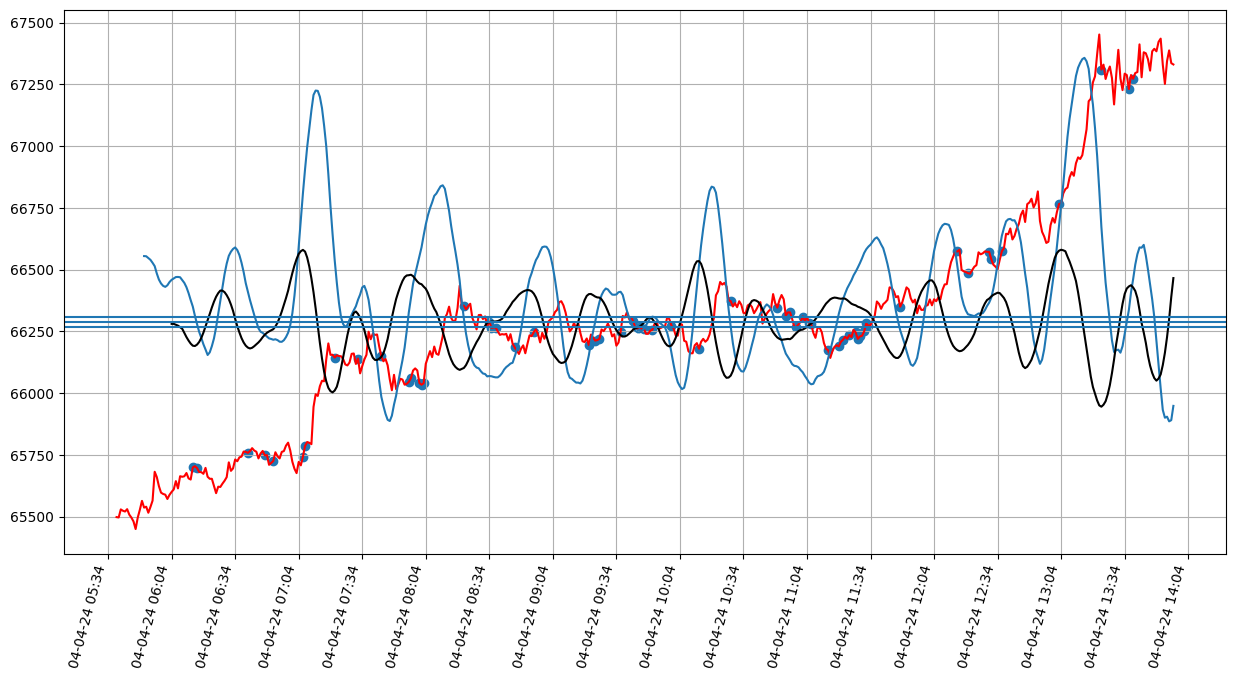

In [52]:
a = 0
d = 500

mp = recent_data.Open[a:a+d].mean()
plt.figure(figsize=(15,8))
plt.plot(recent_data.Tiempo[a:a+d],recent_data.Open[a:a+d].multiply(1),color='red')
plt.plot(recent_data.Tiempo[a:a+d],recent_data.PD_Interpolacion[a:a+d].multiply(30)+mp)
plt.plot(recent_data.Tiempo[a:a+d],recent_data.SD_Interpolacion[a:a+d].multiply(100)+mp,color='k')
# for i in recent_data.Tiempo.iloc[lista_min_max]:
#     plt.axvline(i)
plt.scatter(recent_data.Tiempo.iloc[drlist],recent_data.Open.iloc[drlist])
plt.grid(visible=True)

# Set minor tick locations.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
# plt.gca().xaxis.set_minor_locator(minorLocator)
plt.gcf().autofmt_xdate()
# Set grid to use minor tick locations. 
plt.grid(which = 'minor')
plt.xticks(rotation=75)
plt.axhline(mp)
plt.axhline(np.std(recent_data.SD_Interpolacion)*10 + mp)
plt.axhline(mp - np.std(recent_data.SD_Interpolacion)*10)
# plt.axvline(6500)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

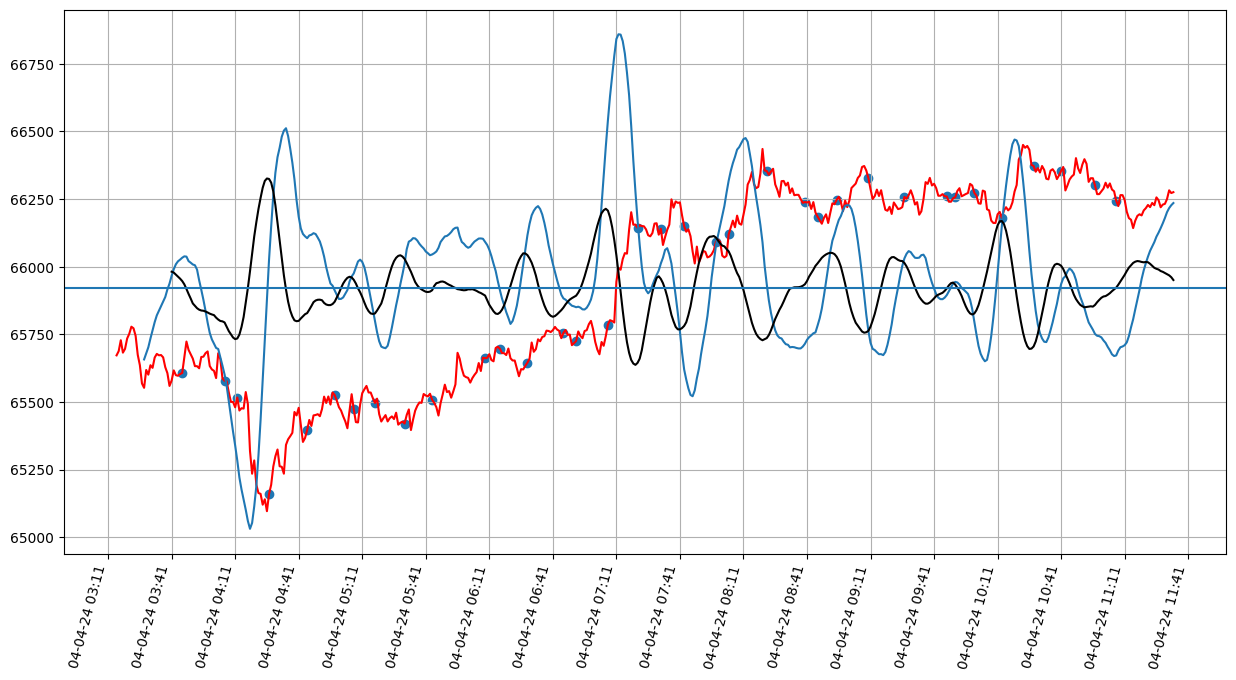

1217